Margin Trading

In [38]:
import numpy as np

In [40]:
P0 = 100
P1 = 110
leverage = 2
margin = P0 / 2

In [42]:
margin

50.0

In [44]:
unlev_return = (P1 - P0) / P0
unlev_return

0.1

In [84]:
lev_return = (P1 - P0) / margin
lev_return

0.2

In [110]:
lev_return == unlev_return * leverage

True

In [112]:
unlev_return = np.log((P1 - P0) / margin + 1)
unlev_return

0.1823215567939546

In [114]:
lev_return = np.log((P1 - P0) / margin + 1)
lev_return

0.1823215567939546

In [116]:
lev_return = unlev_return * leverage

Levered Returns (Part2)

In [139]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt

In [141]:
msft = pd.read_csv('msft.csv', index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01 00:00:00+00:00,45.9000,NaN
2014-10-02 00:00:00+00:00,45.7600,-0.0031
2014-10-03 00:00:00+00:00,46.0900,0.0072
2014-10-06 00:00:00+00:00,46.0900,0.0000
2014-10-07 00:00:00+00:00,45.5300,-0.0122
...,...,...
2021-05-24 00:00:00+00:00,250.7800,0.0229
2021-05-25 00:00:00+00:00,251.7200,0.0037
2021-05-26 00:00:00+00:00,251.4900,-0.0009


In [143]:
msft["Simple_Ret"] = msft.Price.pct_change() 

In [145]:
leverage = 2

In [147]:
msft["Lev_Returns"] = msft.Simple_Ret.mul(leverage)
msft

,Price,Returns,Simple_Ret,Lev_Returns
Date,,,,
2014-10-01 00:00:00+00:00,45.9000,NaN,NaN,NaN
2014-10-02 00:00:00+00:00,45.7600,-0.0031,-0.0031,-0.0061
2014-10-03 00:00:00+00:00,46.0900,0.0072,0.0072,0.0144
2014-10-06 00:00:00+00:00,46.0900,0.0000,0.0000,0.0000
2014-10-07 00:00:00+00:00,45.5300,-0.0122,-0.0122,-0.0243
...,...,...,...,...
2021-05-24 00:00:00+00:00,250.7800,0.0229,0.0229,0.0458
2021-05-25 00:00:00+00:00,251.7200,0.0037,0.0037,0.0075
2021-05-26 00:00:00+00:00,251.4900,-0.0009,-0.0009,-0.0018


In [161]:
msft["Lev_Returns"] = np.where(msft["Lev_Returns"] < -1, -1, msft["Lev_Returns"])

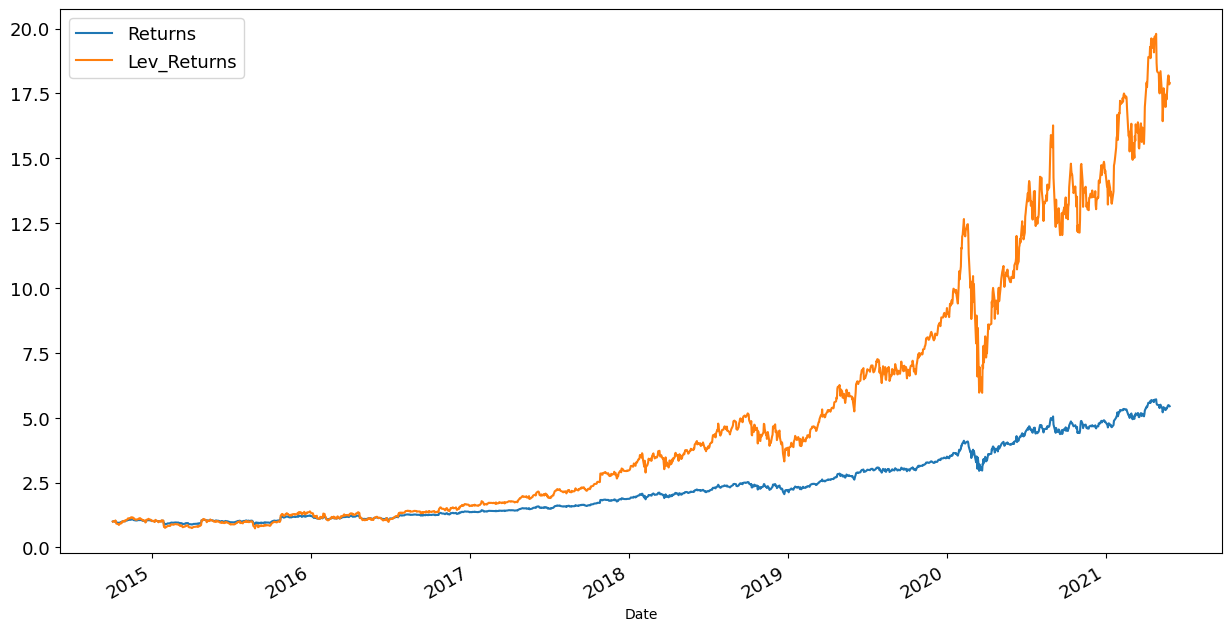

In [163]:
msft[["Returns", "Lev_Returns"]].add(1).cumprod().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [151]:
msft.Simple_Ret.max()

0.14216888119914373

In [153]:
msft.Lev_Returns.max()

0.28433776239828745

In [155]:
msft.Simple_Ret.min()

-0.1473903128642552

In [157]:
msft.Lev_Returns.min()

-0.2947806257285104

In [159]:
-1 / msft.Simple_Ret.min()

6.784706406865346